In [ ]:
#11:45

In [1]:
cd

C:\Users\K Tarun


In [3]:
cd C:\Users\K Tarun\Desktop\Prudent consulting

C:\Users\K Tarun\Desktop\Prudent consulting


In [4]:
ls

 Volume in drive C is Acer
 Volume Serial Number is EC9F-7E59

 Directory of C:\Users\K Tarun\Desktop\Prudent consulting

08-06-2024  11:41    <DIR>          .
08-06-2024  11:40    <DIR>          ..
08-06-2024  11:23    <DIR>          .ipynb_checkpoints
08-06-2024  11:41             1,113 Hackthon.ipynb
08-06-2024  11:41           393,899 sample_submission.csv
08-06-2024  11:41           975,309 test.csv
08-06-2024  11:41        17,333,449 train.csv
               4 File(s)     18,703,770 bytes
               3 Dir(s)  17,126,293,504 bytes free


In [5]:
#importing the essential libraries

In [6]:
import numpy as np
import pandas as pd

In [7]:
#importing libraries for visulaization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
### 1. Loading the data

In [10]:
data = pd.read_csv('train.csv')

In [13]:
#checking the dimensions of the data
print(f"Shape of Data is {data.shape}")

Shape of Data is (913000, 4)


In [14]:
#columns available
data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [15]:
#identifying the dependent and independent columns
input_columns = ['date', 'store', 'item']
target_column = ['sales']

In [12]:
#retriving the N records of the data
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [11]:
data.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [16]:
#checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [17]:
data.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [18]:
#checking for duplicate records
data.duplicated().sum()

0

In [19]:
#checking the missing values
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [20]:
#understanding the co-relation between the records
corr = data[['store', 'item', 'sales']].corr()

<Axes: >

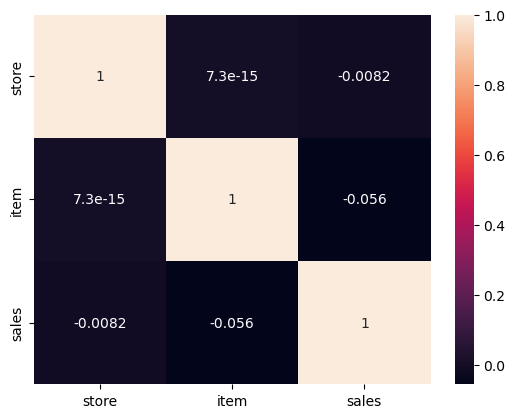

In [22]:
sns.heatmap(corr, annot=True)

### Observation: from the above visulation we can observe that there is no significant corelation between the given dependent and independent columns

In [23]:
#Since the data is time series data the date column is should be in "time series format", convert it datatime format

In [24]:
data['date']  = pd.to_datetime(data['date'])

In [25]:
data.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [26]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [28]:
#minimum and maximum dates
print("start date:",min(data['date']))
print("end date:",max(data['date']))

start date: 2013-01-01 00:00:00
end date: 2017-12-31 00:00:00


C:\Users\K Tarun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


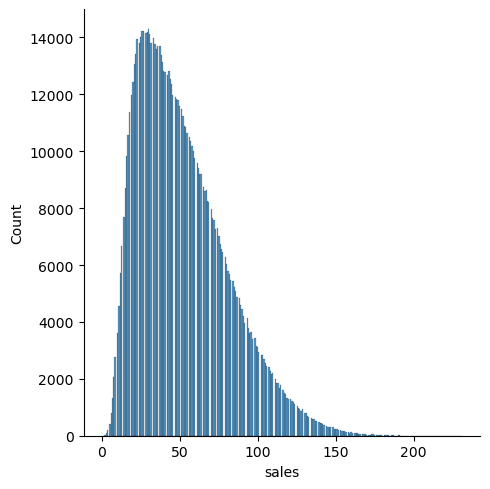

In [32]:
#density of sales
sns.displot(data['sales'])

In [35]:
#maximum and minimum sale over the given period of time
maxSale = max(data['sales'])
minSale = min(data['sales'])
print(f"maximum sales {maxSale}, minmun sales {minSale}")

maximum sales 231, minmun sales 0


In [36]:
#checking for the records with maximum and minimun sale
print("Max Sales records")
data.loc[data['sales'] == maxSale]

Max Sales records


,date,store,item,sales
259109,2017-07-02,2,15,231


In [37]:
print("Min Sales records")
data.loc[data['sales'] == minSale]

Min Sales records


,date,store,item,sales
64289,2014-01-15,6,4,0


In [38]:
#Statistics of the data
data.describe()

,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000
std,NaN,2.872283,14.430878,28.801144


In [46]:
#no of unique stores
data['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [48]:
#no of unique items
data['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [66]:
# no of sales happend in each store
data['store'].value_counts()

store
1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: count, dtype: int64

In [65]:
#total sales of each product
data['item'].value_counts()

item
1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: count, dtype: int64

In [76]:
import datetime as dt

In [84]:
#Feature Engineering
data['year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.weekday

In [85]:
data

,date,store,item,sales,year,Month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5
...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017,12,27,2
912996,2017-12-28,10,50,59,2017,12,28,3
912997,2017-12-29,10,50,74,2017,12,29,4
912998,2017-12-30,10,50,62,2017,12,30,5


In [88]:
# Creating dictionaries for mapping
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

In [90]:
# Applying the mappings
data['weekday'] = data['weekday'].map(weekdays)
data['Month'] = data['Month'].map(months)

In [91]:
data.head()

,date,store,item,sales,year,Month,day,weekday
0,2013-01-01,1,1,13,2013,January,1,Tuesday
1,2013-01-02,1,1,11,2013,January,2,Wednesday
2,2013-01-03,1,1,14,2013,January,3,Thursday
3,2013-01-04,1,1,13,2013,January,4,Friday
4,2013-01-05,1,1,10,2013,January,5,Saturday


<Axes: title={'center': 'Sales per weekday'}, xlabel='weekday', ylabel='sales'>

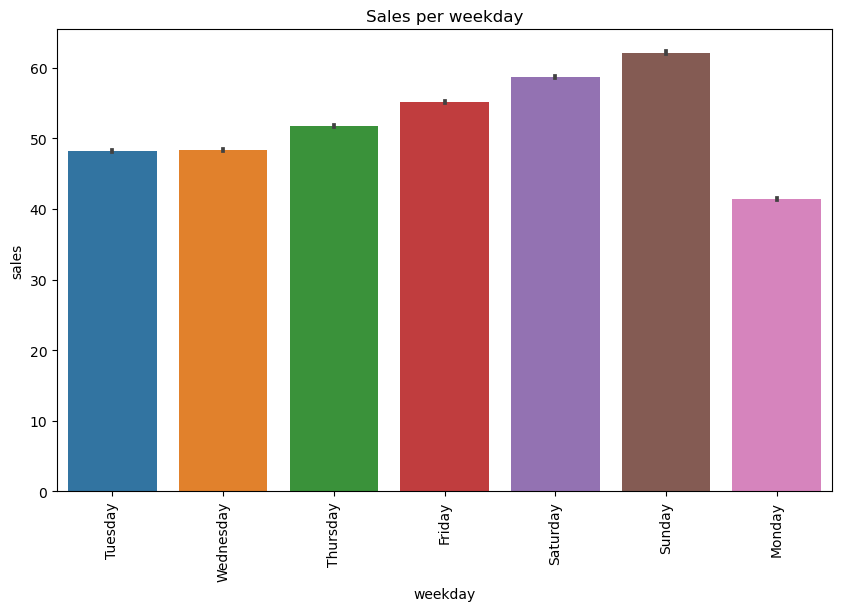

In [96]:
#Total yearly and monthly and daily sales
plt.figure(figsize=(10,6))
plt.title('Sales per weekday',loc = 'center')
plt.xticks(rotation=90)
sns.barplot(data=data,x = 'weekday', y='sales')

### Observation: From the above visualization the sales are high on weekends and comparitively low on the Normal days

<Axes: title={'center': 'Sales per Month'}, xlabel='Month', ylabel='sales'>

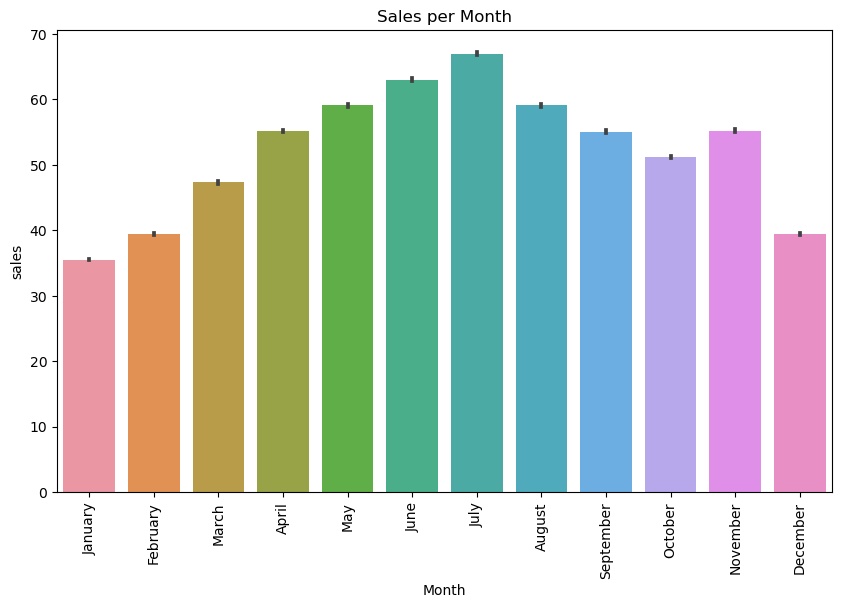

In [98]:
#Total yearly and monthly and daily sales
plt.figure(figsize=(10,6))
plt.title('Sales per Month',loc = 'center')
plt.xticks(rotation=90)
sns.barplot(data=data,x = 'Month', y='sales')

### The objective of this competition is to predict 3 months of item-level sales data at different store locations.

In [99]:
"""as per the objective of the project we need to build the different model for each store and forecast the results"""
store_id = data['store'].unique()

In [105]:
#creating 10 diiferent dataframes filtered with store id
def Store_id_extract(Id):
    return data.loc[data['store']==Id]

In [114]:
store1 = Store_id_extract(1)

In [115]:
store1.head()

,date,store,item,sales,year,Month,day,weekday
0,2013-01-01,1,1,13,2013,January,1,Tuesday
1,2013-01-02,1,1,11,2013,January,2,Wednesday
2,2013-01-03,1,1,14,2013,January,3,Thursday
3,2013-01-04,1,1,13,2013,January,4,Friday
4,2013-01-05,1,1,10,2013,January,5,Saturday


In [116]:
store1 = store1.sort_values(by='date')

In [117]:
store1.set_index('date', inplace=True)
store1.head()

,store,item,sales,year,Month,day,weekday
date,,,,,,,
2013-01-01,1,1,13,2013,January,1,Tuesday
2013-01-01,1,46,30,2013,January,1,Tuesday
2013-01-01,1,28,49,2013,January,1,Tuesday
2013-01-01,1,11,37,2013,January,1,Tuesday
2013-01-01,1,27,14,2013,January,1,Tuesday


<Axes: title={'center': 'Store1 sales'}, xlabel='date', ylabel='sales'>

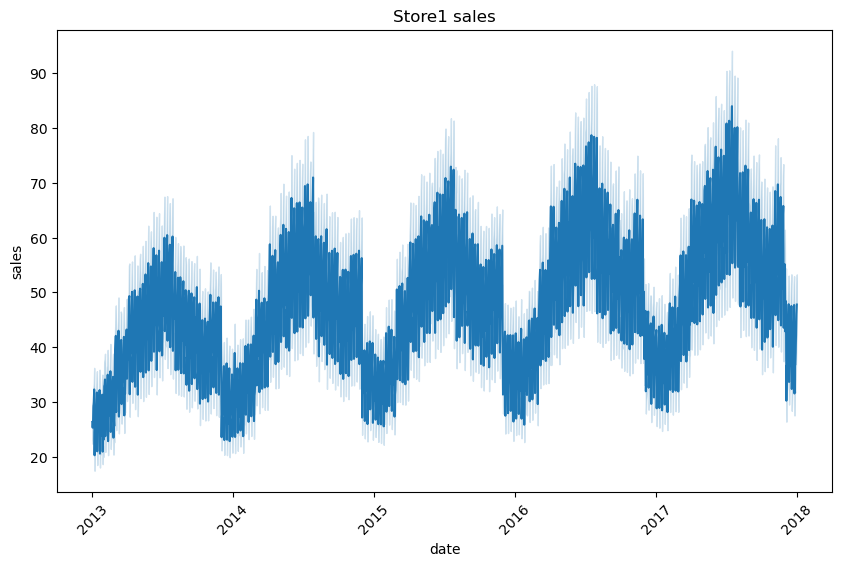

In [122]:
#Amount of sales in store1 
plt.figure(figsize=(10,6))
plt.title('Store1 sales',loc = 'center')
plt.xticks(rotation=45)
sns.lineplot(data=store1,x = store1.index, y='sales')

### Observation: the sales are high at the middel of the year and less at the both start and the end of the year

In [128]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [129]:
# Function to perform the ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    return result

In [130]:
adf_result = adf_test(store1['sales'])

ADF Statistic: -14.538028879161766
p-value: 5.200485782837858e-27
Critical Value 1%: -3.430421678931965
Critical Value 5%: -2.8615716809313896
Critical Value 10%: -2.566786862657035


In [134]:
adf_result[1] > 0.05

False

In [135]:
# Differencing if not stationary
if adf_result[1] > 0.05:
    store1['sales_diff'] = store1['sales'].diff().dropna()
    adf_test(store1['sales_diff'].dropna())
    d = 1
else:
    d = 0

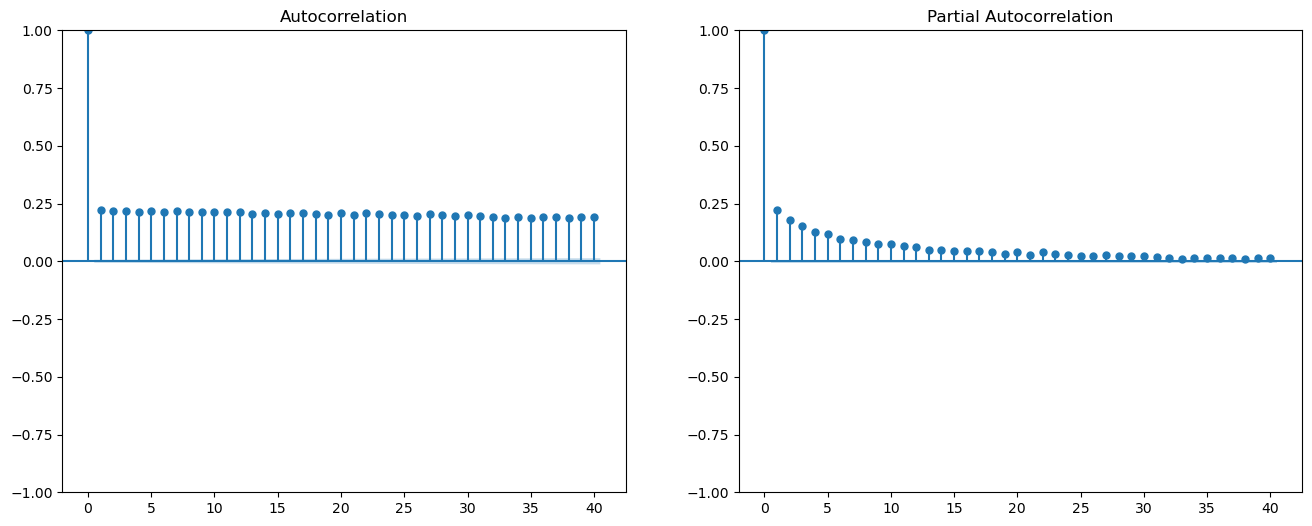

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(store1['sales'], lags=40, ax=axes[0])
plot_pacf(store1['sales'], lags=40, ax=axes[1])
plt.show()

In [110]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [139]:
#since the data is stationary d = 0
p = range(0, 6)
q = range(0, 6)
pdq = list(itertools.product(p, [d], q))

best_aic = float("inf")
best_pdq = None

for param in pdq:
    try:
        model = sm.tsa.ARIMA(store1['sales'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print('Best ARIMA(p, d, q) =', best_pdq)

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init

Best ARIMA(p, d, q) = (1, 0, 1)


In [140]:
# Train the best ARIMA model
best_model = sm.tsa.ARIMA(store1['sales'], order=best_pdq)
results = best_model.fit()

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [141]:
train_size = int(len(store1) * 0.8)
train, test = store1[:train_size], store1[train_size:]
forecast = results.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

In [142]:
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 24.100153230994863
MAE: 20.21915887502601


In [160]:
#creating 10 diiferent dataframes filtered with store id
def Store_id_extract(data, store_id):
    """
    Extracts data for a specific store ID and performs necessary preprocessing steps.
    Args:
    - data: DataFrame containing sales data
    - store_id: ID of the store to extract
    Returns:
    - DataFrame: Preprocessed DataFrame for the specified store ID
    """
    # Filter data by store ID
    store_data = data.loc[data['store'] == store_id]
    
    # Sort data by date
    store_data = store_data.sort_values(by='date')
    
    # Set date column as index
    store_data.set_index('date', inplace=True)
    
    return store_data

### Extracting data based on the store id

In [164]:
store2 = Store_id_extract(data,2)
store3 = Store_id_extract(data,3)
store4 = Store_id_extract(data,4)
store5 = Store_id_extract(data,5)
store6 = Store_id_extract(data,6)
store7 = Store_id_extract(data,7)
store8 = Store_id_extract(data,8)
store9 = Store_id_extract(data,9)
store10 = Store_id_extract(data,10)

In [165]:
stores = [store2, 
store3, 
store4, 
store5, 
store6, 
store7, 
store8, 
store9, 
store10]

In [ ]:
#Since the data exibhting the same patterns as above data therfore considering the same p,d,q values (1,0,1)

In [175]:
RMSE = []
MAE = []

### Predictive model for store 2

In [225]:
best_model = sm.tsa.ARIMA(store2['sales'], order=best_pdq)
result2 = best_model.fit()
train_size = int(len(store2) * 0.8)
train, test = store2[:train_size], store2[train_size:]
forecast = result2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
RMSE.append(rmse)
MAE.append(mae)

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 33.6778901195916
MAE: 28.36867981607678


### Predicitve model for Store3

In [224]:
best_model = sm.tsa.ARIMA(store3['sales'], order=best_pdq)
result3 = best_model.fit()
train_size = int(len(store2) * 0.8)
train, test = store3[:train_size], store3[train_size:]
forecast = result3.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
RMSE.append(rmse)
MAE.append(mae)

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 29.99843426055256
MAE: 25.23229978851434


### predictive model for store4 

In [223]:
best_model = sm.tsa.ARIMA(store4['sales'], order=best_pdq)
result4 = best_model.fit()
train_size = int(len(store2) * 0.8)
train, test = store4[:train_size], store4[train_size:]
forecast = result4.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
RMSE.append(rmse)
MAE.append(mae)

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 27.841126566880167
MAE: 23.399262068770575


In [210]:
### predictive model for store 5

In [222]:
best_model = sm.tsa.ARIMA(store5['sales'], order=best_pdq)
result5 = best_model.fit()
train_size = int(len(store5) * 0.8)
train, test = store5[:train_size], store5[train_size:]
forecast = result5.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
RMSE.append(rmse)
MAE.append(mae)

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 20.47272790086972
MAE: 17.159328857953696


### predictive model for store 6 

In [213]:
best_model = sm.tsa.ARIMA(store6['sales'], order=best_pdq)
result6 = best_model.fit()
train_size = int(len(store6) * 0.8)
train, test = store6[:train_size], store6[train_size:]
forecast = result6.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
RMSE.append(rmse)
MAE.append(mae)

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 20.466817170166482
MAE: 17.112344595943153


### predictive model for store7

In [214]:
best_model = sm.tsa.ARIMA(store7['sales'], order=best_pdq)
result7 = best_model.fit()
train_size = int(len(store7) * 0.8)
train, test = store7[:train_size], store7[train_size:]
forecast = result7.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
RMSE.append(rmse)
MAE.append(mae)

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 18.78430922112976
MAE: 15.728775824850697


### predictive model for store 8

In [ ]:
best_model = sm.tsa.ARIMA(store8['sales'], order=best_pdq)
result8 = best_model.fit()
train_size = int(len(store8) * 0.8)
train, test = store8[:train_size], store8[train_size:]
forecast = result8.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
RMSE.append(rmse)
MAE.append(mae)

### predictive model for store 9

In [221]:
best_model = sm.tsa.ARIMA(store9['sales'], order=best_pdq)
result9 = best_model.fit()
train_size = int(len(store9) * 0.8)
train, test = store9[:train_size], store9[train_size:]
forecast = result9.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
RMSE.append(rmse)
MAE.append(mae)

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 27.95275730690179
MAE: 23.473273396274145


### predictive model for store 10

In [220]:
best_model = sm.tsa.ARIMA(store10['sales'], order=best_pdq)
result10 = best_model.fit()
train_size = int(len(store10) * 0.8)
train, test = store10[:train_size], store10[train_size:]
forecast = result10.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
RMSE.append(rmse)
MAE.append(mae)

C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\K Tarun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 29.577727970249626
MAE: 24.889872819955936


## Test Data

In [193]:
test_data = pd.read_csv('test.csv')

In [194]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [195]:
print(f"start date : {min(test_data['date'])}")
print(f"end date : {max(test_data['date'])}")

start date : 2018-01-01 00:00:00
end date : 2018-03-31 00:00:00


In [196]:
sorted_data = test_data.sort_values(by='date')

In [197]:
sorted_data.head()

,id,date,store,item
0,0,2018-01-01,1,1
32940,32940,2018-01-01,7,37
3960,3960,2018-01-01,5,5
32850,32850,2018-01-01,6,37
32760,32760,2018-01-01,5,37


In [198]:
sorted_data.set_index('date', inplace=True)
sorted_data.head()

,id,store,item
date,,,
2018-01-01,0,1,1
2018-01-01,32940,7,37
2018-01-01,3960,5,5
2018-01-01,32850,6,37
2018-01-01,32760,5,37


In [200]:
#creating 10 diiferent dataframes filtered with store id
def Store_id_extract(Id):
    return sorted_data.loc[sorted_data['store']==Id]

In [201]:
teststore1 = Store_id_extract(1)
teststore2 = Store_id_extract(2)
teststore3 = Store_id_extract(3)
teststore4 = Store_id_extract(4)
teststore5 = Store_id_extract(5)
teststore6 = Store_id_extract(6)
teststore7 = Store_id_extract(7)
teststore8 = Store_id_extract(8)
teststore9 = Store_id_extract(9)
teststore10 = Store_id_extract(10)

In [202]:
len(teststore1

4500

In [203]:
forecast1 = results.predict(start=0, end=len(teststore1) - 1, typ='levels')

In [229]:
forecast2 = results.predict(start=0, end=len(teststore2) - 1, typ='levels')
forecast3 = results.predict(start=0, end=len(teststore3) - 1, typ='levels')
forecast4 = results.predict(start=0, end=len(teststore4) - 1, typ='levels')
forecast5 = results.predict(start=0, end=len(teststore5) - 1, typ='levels')
forecast6 = result.predict(start=0, end=len(teststore6) - 1, typ='levels')
forecast7 = result.predict(start=0, end=len(teststore7) - 1, typ='levels')
forecast8 = results.predict(start=0, end=len(teststore8) - 1, typ='levels')
forecast9 = results.predict(start=0, end=len(teststore9) - 1, typ='levels')
forecast10 = results.predict(start=0, end=len(teststore10) - 1, typ='levels')

In [230]:
IDs = []

In [231]:
testframes = [teststore1, 
teststore2, 
teststore3,
teststore4, 
teststore5, 
teststore6, 
teststore7, 
teststore8, 
teststore9, 
teststore10]

In [250]:
forecasts = [forecast1,
forecast2, 
forecast3, 
forecast4, 
forecast5, 
forecast6, 
forecast7, 
forecast8, 
forecast9, 
forecast10]

In [234]:
for frames in testframes:
    for i in frames['id']:
        IDs.append(i)

In [255]:
forecast =[]

In [265]:
for i in forecast10:
    forecast.append(i)

In [247]:
len(IDs)

45000

In [266]:
len(forecast)

45000

In [267]:
output = {'id':IDs, 'sales':forecast}

In [269]:
output = pd.DataFrame(output)

In [271]:
output_sorted = output.sort_values(by='id')

In [273]:
output_sorted.head()

,id,sales
0,0,67.023085
89,1,38.435126
134,2,39.219571
188,3,40.806675
225,4,43.961442


In [272]:
# Convert to CSV
output_sorted.to_csv('output_sorted.csv', index=False)